In [1]:
!pip install gprofiler-official pandas seaborn matplotlib

In [2]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from matplotlib_venn import venn3
from gprofiler import GProfiler
from google.colab import files
import os
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [3]:
uploaded = files.upload()

Saving Downregulated_DEGs.csv to Downregulated_DEGs.csv


In [4]:
filtered_genes = pd.read_csv("Downregulated_DEGs.csv")

In [5]:
filtered_genes

,Gene,log2FC,p-value,adj_p-value
0,TUBB,-1.689177,0.000362,0.004818
1,LPP,-1.776559,0.000922,0.009398
2,UGP2,-1.259684,0.004785,0.031507
3,MFN2,-1.370978,0.004161,0.028236
4,HIST1H2BD,-1.058805,0.006919,0.041134
...,...,...,...,...
902,AQP1.1,-1.721401,0.001532,0.013495
903,LCAT,-1.046725,0.006416,0.039011
904,HMGCS2,-1.546631,0.002415,0.018915
905,CCDC68,-1.442749,0.000049,0.001305


In [6]:
filtered_genes.columns

Index(['Gene', 'log2FC', 'p-value', 'adj_p-value'], dtype='object')

In [7]:
df_filtered = filtered_genes.drop(columns=['log2FC', 'p-value', 'adj_p-value'])

In [8]:
gcna_filtered_genes = df_filtered['Gene'].tolist()

In [9]:
len(gcna_filtered_genes)

907

In [10]:
gcna_filtered_genes

['TUBB',
 'LPP',
 'UGP2',
 'MFN2',
 'HIST1H2BD',
 'SEMA3E',
 'RGS5',
 'MGP',
 'TP53I3',
 'KCNMB1',
 'SECTM1',
 'CA1',
 'MTMR9',
 'IL10RA',
 'LRRC17',
 'SLC15A1',
 'PLAC8',
 'SLC30A4',
 'SNCG',
 'CLEC10A',
 'GCNT2',
 'SLC22A17',
 'EFEMP2',
 'DMD',
 'SOX10',
 'CACNB2',
 'POU2F2',
 'MPP2',
 'ADCY9',
 'RGL1',
 'ATP6V1G2',
 'IL1R2',
 'SCARA3',
 'CASZ1',
 'ROR1',
 'RGS1',
 'METTL7A',
 'SPOCK2',
 'GFRA2',
 'BNC2',
 'PPP2R3A',
 'MYOT',
 'TRPC6',
 'CDKN2C.1',
 'ANK3.1',
 'MEOX1',
 'C1QA',
 'CBX7',
 'MT1M',
 'TSPYL2',
 'ZFHX4',
 'CCDC69',
 'MGLL',
 'CFH',
 'CRABP1',
 'CYR61',
 'CD37',
 'CRTAC1',
 'DTX3',
 'ST6GALNAC2',
 'CAV2',
 'SLC1A1',
 'HLA-DOA',
 'PDE8B',
 'ACVRL1',
 'MEP1A',
 'CEACAM7',
 'MYH11',
 'MMRN1',
 'ACAA2',
 'POPDC2',
 'ITGA8',
 'SGK2',
 'BTNL3',
 'BMP5',
 'PPP2R2B',
 'WFDC1',
 'VCL',
 'NR3C2',
 'CTF1',
 'ANK3.2',
 'BTK',
 'LARGE',
 'COX7A1',
 'CA2',
 'PDLIM4',
 'HIF3A',
 'CITED2',
 'ADAMTS8',
 'ITIH5',
 'SORBS1',
 'SLC24A3',
 'MTUS1',
 'DNAJB5',
 'CNNM2',
 'FBLN5',
 'ADAM28',
 'C

In [11]:
df = pd.DataFrame({"Genes": gcna_filtered_genes})

In [12]:
df

,Genes
0,TUBB
1,LPP
2,UGP2
3,MFN2
4,HIST1H2BD
...,...
902,AQP1.1
903,LCAT
904,HMGCS2
905,CCDC68


In [13]:
gp = GProfiler(return_dataframe=True)
gene_list = gcna_filtered_genes

In [14]:
go_results_bp = gp.profile(organism='hsapiens', query=gene_list, sources=["GO:BP"])

print(go_results_bp.head())

  source      native                                name       p_value  \
0  GO:BP  GO:0032501    multicellular organismal process  2.746354e-46   
1  GO:BP  GO:0050896                response to stimulus  1.469458e-38   
2  GO:BP  GO:0048856    anatomical structure development  7.120846e-38   
3  GO:BP  GO:0032502               developmental process  1.202347e-34   
4  GO:BP  GO:0007275  multicellular organism development  1.938723e-33   

   significant                                        description  term_size  \
0         True  "Any biological process, occurring at the leve...       7322   
1         True  "Any process that results in a change in state...       8999   
2         True  "The biological process whose specific outcome...       5997   
3         True  "A biological process whose specific outcome i...       6553   
4         True  "The biological process whose specific outcome...       4727   

   query_size  intersection_size  effective_domain_size  precision    reca

In [15]:
go_results_bp.shape

(537, 14)

In [16]:
go_results_mf = gp.profile(organism='hsapiens', query=gene_list, sources=["GO:MF"])

print(go_results_mf.head())

  source      native                          name       p_value  significant  \
0  GO:MF  GO:0005102    signaling receptor binding  6.693031e-18         True   
1  GO:MF  GO:0005515               protein binding  1.017632e-17         True   
2  GO:MF  GO:0036094        small molecule binding  8.232202e-09         True   
3  GO:MF  GO:0043167                   ion binding  3.045893e-08         True   
4  GO:MF  GO:0008092  cytoskeletal protein binding  4.755720e-08         True   

                                         description  term_size  query_size  \
0  "Binding to one or more specific sites on a re...       1521         792   
1          "Binding to a protein." [GOC:go_curators]      15123         792   
2  "Binding to a small molecule, any low molecula...       6577         792   
3  "Binding to an ion, a charged atoms or groups ...       6377         792   
4  "Binding to a protein component of a cytoskele...       1001         792   

   intersection_size  effective_domain

In [17]:
go_results_mf.shape

(57, 14)

In [18]:
go_results_cc = gp.profile(organism='hsapiens', query=gene_list, sources=["GO:CC"])

print(go_results_cc.head())

  source      native                  name       p_value  significant  \
0  GO:CC  GO:0071944        cell periphery  1.340341e-48         True   
1  GO:CC  GO:0005886       plasma membrane  1.533343e-32         True   
2  GO:CC  GO:0005576  extracellular region  2.477553e-29         True   
3  GO:CC  GO:0005615   extracellular space  1.668893e-27         True   
4  GO:CC  GO:0030054         cell junction  9.962616e-23         True   

                                         description  term_size  query_size  \
0  "The broad region around and including the pla...       6347         804   
1  "The membrane surrounding a cell that separate...       5866         804   
2  "The space external to the outermost structure...       4258         804   
3  "That part of a multicellular organism outside...       3315         804   
4  "A cellular component that forms a specialized...       2401         804   

   intersection_size  effective_domain_size  precision    recall    query  \
0        

In [19]:
go_results_cc.shape

(109, 14)

In [20]:
go_results_cc.columns

Index(['source', 'native', 'name', 'p_value', 'significant', 'description',
       'term_size', 'query_size', 'intersection_size', 'effective_domain_size',
       'precision', 'recall', 'query', 'parents'],
      dtype='object')

In [21]:
total_genes= len(gcna_filtered_genes)
print("Total Downregulated genes: ",total_genes)

Total Downregulated genes:  907


In [22]:
def process_go_category(source, enrichment_results):
    df = enrichment_results[enrichment_results['source'] == source][["source","native","name", "intersection_size", "p_value"]].head(10)
    df["%"] = (df["intersection_size"] / total_genes)
    #df["p_value"] = df["p_value"].apply(lambda x: f"{x:.50f}")

    df = df[["source","native", "name", "%", "p_value"]]  # Keep only required columns
    df.columns = ["GO Category","GO ID", "GO Term", "%", "p-value"]
    return df

In [23]:
bp_terms = process_go_category('GO:BP', go_results_bp)
mf_terms = process_go_category('GO:MF', go_results_mf)
cc_terms = process_go_category('GO:CC', go_results_cc)

In [24]:
bp_terms

,GO Category,GO ID,GO Term,%,p-value
0,GO:BP,GO:0032501,multicellular organismal process,0.522602,2.746354e-46
1,GO:BP,GO:0050896,response to stimulus,0.575524,1.469458e-38
2,GO:BP,GO:0048856,anatomical structure development,0.441014,7.120846e-38
3,GO:BP,GO:0032502,developmental process,0.458655,1.202347e-34
4,GO:BP,GO:0007275,multicellular organism development,0.367144,1.938723e-33
5,GO:BP,GO:0048731,system development,0.331863,2.612867e-33
6,GO:BP,GO:0051239,regulation of multicellular organismal process,0.266814,2.052366e-31
7,GO:BP,GO:0065008,regulation of biological quality,0.262404,8.292161e-30
8,GO:BP,GO:0065007,biological regulation,0.691290,3.652718e-28
9,GO:BP,GO:0051716,cellular response to stimulus,0.477398,4.372050e-28


In [25]:
mf_terms

,GO Category,GO ID,GO Term,%,p-value
0,GO:MF,GO:0005102,signaling receptor binding,0.151047,6.693031e-18
1,GO:MF,GO:0005515,protein binding,0.766262,1.017632e-17
2,GO:MF,GO:0036094,small molecule binding,0.381477,8.232202e-09
3,GO:MF,GO:0043167,ion binding,0.369350,3.045893e-08
4,GO:MF,GO:0008092,cytoskeletal protein binding,0.091510,4.755720e-08
5,GO:MF,GO:0003779,actin binding,0.052922,1.170152e-07
6,GO:MF,GO:0005201,extracellular matrix structural constituent,0.029768,2.451749e-07
7,GO:MF,GO:0005178,integrin binding,0.028666,3.496095e-07
8,GO:MF,GO:0060089,molecular transducer activity,0.146637,1.934694e-06
9,GO:MF,GO:0038023,signaling receptor activity,0.146637,1.934694e-06


In [26]:
cc_terms

,GO Category,GO ID,GO Term,%,p-value
0,GO:CC,GO:0071944,cell periphery,0.474090,1.340341e-48
1,GO:CC,GO:0005886,plasma membrane,0.411246,1.533343e-32
2,GO:CC,GO:0005576,extracellular region,0.324146,2.477553e-29
3,GO:CC,GO:0005615,extracellular space,0.270121,1.668893e-27
4,GO:CC,GO:0030054,cell junction,0.207277,9.962616e-23
5,GO:CC,GO:0016020,membrane,0.538037,1.670681e-17
6,GO:CC,GO:0043292,contractile muscle fiber,0.050717,2.322215e-17
7,GO:CC,GO:0031982,vesicle,0.276736,2.521872e-17
8,GO:CC,GO:0030016,myofibril,0.048512,1.743080e-16
9,GO:CC,GO:0062023,collagen-containing extracellular matrix,0.062845,1.901521e-16


In [27]:
bp_terms.to_csv("Down_Top10_GO_BP.csv", index=False)
mf_terms.to_csv("Down_Top10_GO_MF.csv", index=False)
cc_terms.to_csv("Down_Top10_GO_CC.csv", index=False)

In [28]:
files.download("Down_Top10_GO_BP.csv")
files.download("Down_Top10_GO_MF.csv")
files.download("Down_Top10_GO_CC.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
top10_go = pd.concat([bp_terms, cc_terms, mf_terms])
top10_go['GO Category'] = top10_go['GO Category'].replace({'GO:BP': 'BP', 'GO:MF': 'MF', 'GO:CC': 'CC'})
top10_go.to_csv("Down_Top10_GO_All.csv", index=False)

print(top10_go)

  GO Category       GO ID                                         GO Term  \
0          BP  GO:0032501                multicellular organismal process   
1          BP  GO:0050896                            response to stimulus   
2          BP  GO:0048856                anatomical structure development   
3          BP  GO:0032502                           developmental process   
4          BP  GO:0007275              multicellular organism development   
5          BP  GO:0048731                              system development   
6          BP  GO:0051239  regulation of multicellular organismal process   
7          BP  GO:0065008                regulation of biological quality   
8          BP  GO:0065007                           biological regulation   
9          BP  GO:0051716                   cellular response to stimulus   
0          CC  GO:0071944                                  cell periphery   
1          CC  GO:0005886                                 plasma membrane   

In [30]:
files.download("Down_Top10_GO_All.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bar Plot with % and -log10(p-value) as Color

In [31]:
top10_bp = bp_terms.nlargest(10, 'p-value')
top10_mf = mf_terms.nlargest(10, 'p-value')
top10_cc = cc_terms.nlargest(10, 'p-value')

### Function to create bar plot

In [32]:
def plot_go_terms(data, category, color_palette, save_path):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Normalize p-values for color mapping
    norm = mcolors.LogNorm(vmin=data["p-value"].min(), vmax=data["p-value"].max())
    cmap = plt.get_cmap(color_palette)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    sns.barplot(
        data=data,
        x="p-value",
        y="GO Term",
        hue="GO Term",
        dodge=False,
        palette=color_palette,
        legend=False,
        ax=ax
    )

    ax.set_xlabel("P-value (Lower is better)", fontsize=12)
    ax.set_xscale('log')
    ax.set_ylabel("GO Terms", fontsize=12)
    ax.set_title(f"Top 10 GO {category} Terms for downregulated DEGs", fontsize=14)

    min_p = data["p-value"].min()
    max_p = data["p-value"].max()
    ax.set_xlim(min_p * 0.8, max_p * 1.2)
    ax.invert_yaxis()

    # Add color bar
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
    cbar.set_label("P-value Scale")

    if save_path is None:
        save_path = f"go_terms_{category}.png"

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved as {save_path}")

### Plot BP, MF, and CC separately

Plot for top 10 BP

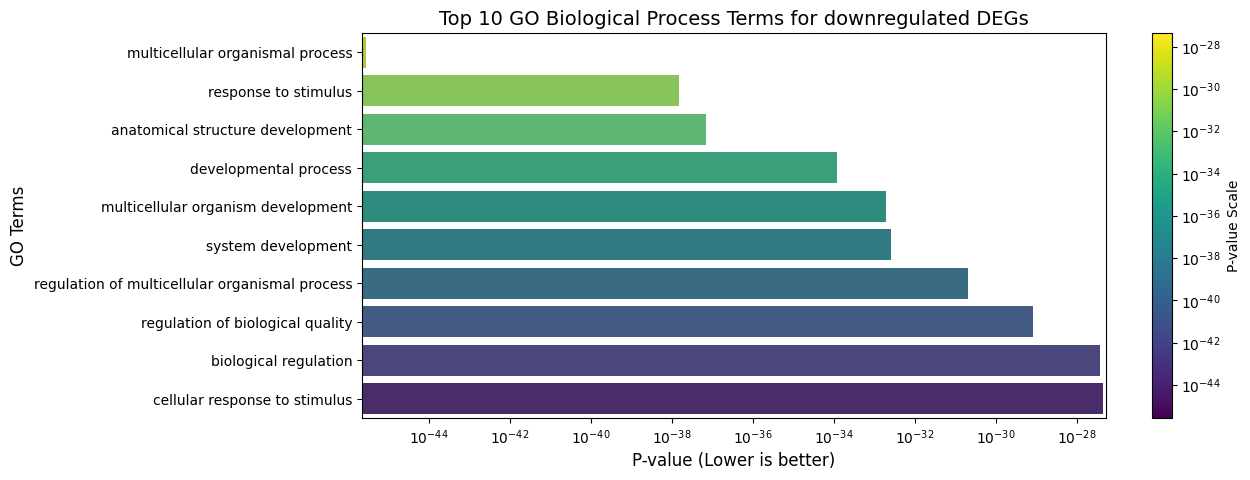

Plot saved as Down_go_BP.png


In [33]:
plot_go_terms(top10_bp, 'Biological Process', 'viridis',save_path="Down_go_BP.png")

Plot for top 10 MF

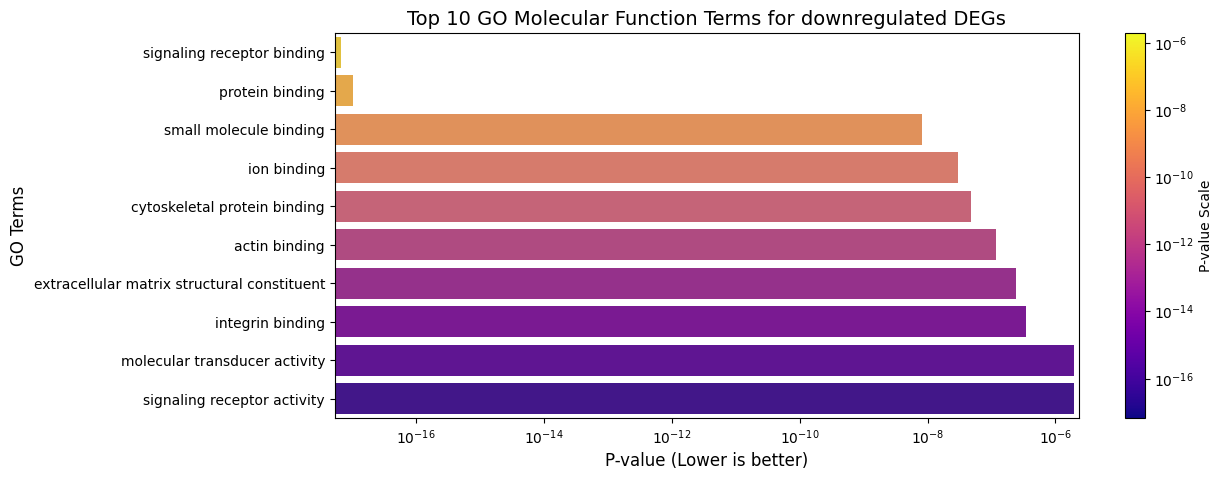

Plot saved as Down_go_MF.png


In [34]:
plot_go_terms(top10_mf, 'Molecular Function', 'plasma',save_path="Down_go_MF.png")

Plot for top 10 CC

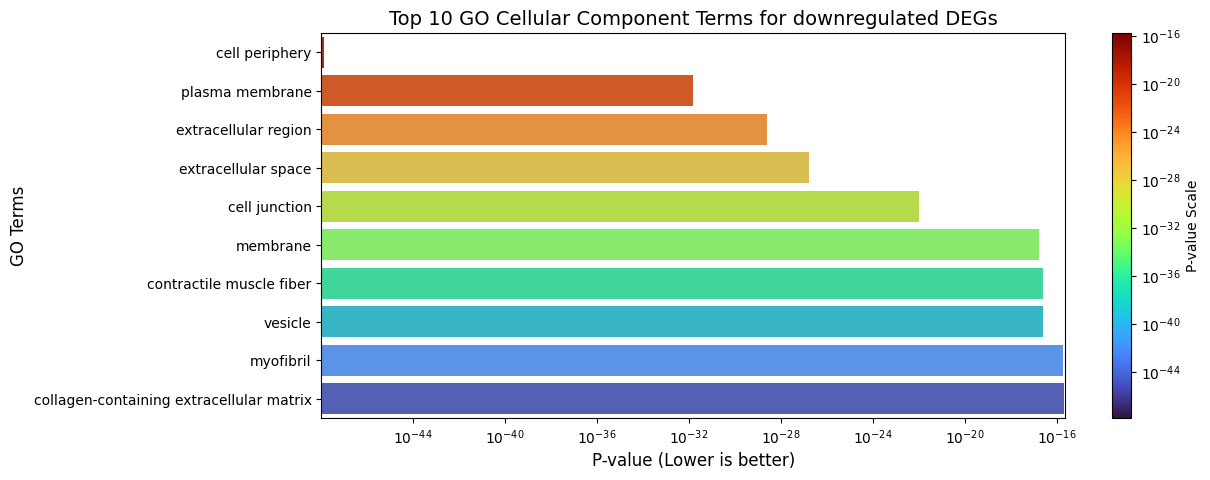

Plot saved as Down_go_CC.png


In [35]:
plot_go_terms(top10_cc, 'Cellular Component', 'turbo',save_path="Down_go_CC.png")

Download Bar Plots

In [36]:
files.download("Down_go_BP.png")
files.download("Down_go_MF.png")
files.download("Down_go_CC.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>